In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
MAINDIR = "./gdrive/My Drive/EA-test/"

In [0]:
df_players = pd.read_csv(MAINDIR + 'CompleteCSVDataset.csv')
df_countries = pd.read_csv(MAINDIR + 'CompleteJSONDataset.csv') 
#One language can exist in different continents so to avoid duplication of row, we eliminate the rows
df_countries.drop(columns=['ID_continent','continent_name'], inplace=True)

In [0]:
#We try a first merge and found some miss values in countries
df2 =df_players.merge(df_countries, how='left',left_on='Nationality',right_on='country_name')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25794 entries, 0 to 25793
Data columns (total 80 columns):
ID                     25794 non-null int64
Name                   25794 non-null object
Age                    25794 non-null int64
Photo                  25794 non-null object
Nationality            25794 non-null object
Flag                   25794 non-null object
Overall                25794 non-null int64
Potential              25794 non-null int64
Club                   25321 non-null object
Club Logo              25794 non-null object
Value                  25794 non-null float64
Wage                   25794 non-null int64
Special                25794 non-null int64
Acceleration           25794 non-null int64
Aggression             25794 non-null int64
Agility                25794 non-null int64
Balance                25794 non-null int64
Ball control           25794 non-null int64
Composure              25794 non-null int64
Crossing               25794 non-null int64
Cur

In [12]:
#This is due to different names for the same country or the use of The United Kingdom instead of the name of their four nations
series = df2[df2.ID_ctlg.isnull()]['Nationality']
series.unique()

array(['Wales', 'England', 'Bosnia Herzegovina', 'Korea Republic',
       'DR Congo', 'Republic of Ireland', 'Northern Ireland', 'Scotland',
       'China PR', 'FYR Macedonia', 'Guinea Bissau', 'Congo',
       'Trinidad & Tobago', 'Korea DPR', 'Central African Rep.',
       'St Kitts Nevis', 'Antigua & Barbuda', 'São Tomé & Príncipe',
       'St Lucia', 'Brunei Darussalam'], dtype=object)

In [0]:
#We have to change this manually
chg_name = [
 "United Kingdom",
 "United Kingdom",
 "Bosnia and Herzegovina",
 "South Korea",
 "Democratic Republic of the Congo",
 "Ireland",
 "United Kingdom",
 "United Kingdom",
 "China",
 "North Macedonia",
 "Guinea-Bissau",
 "Republic of the Congo",
 "Trinidad and Tobago",
 "North Korea",
 "Central African Republic",
 "Saint Kitts and Nevis",
 "Antigua and Barbuda",
 "São Tomé and Príncipe",
 "Saint Lucia",
 "Brunei"]
#Create dictionary to replace string
repl = dict()
for i,j in zip(series.unique(),chg_name):
   repl.update({i:j})

In [0]:
#Replace country names
df_players.replace({"Nationality": repl},inplace=True)

In [0]:
#Merge again 
df = df_players.merge(df_countries, left_on='Nationality',right_on='country_name')
df.drop(columns='country_name',inplace=True) #Eliminate extra column

In [18]:
#We will check the top 10 languages with by total value
df_value = df.groupby('language_name',as_index=False).agg({'Value':'sum', 'ID':'count'})
df_value.sort_values('Value',ascending=False,inplace=True)
df_value['Value'] = df_value['Value']/1000000
df_value.rename(columns={'Value':'Total Value','ID':'N_players'},inplace=True)
df_value.reset_index(drop=True,inplace=True)
df_value.head(10)

,language_name,Total Value,N_players
0,Spanish,11218.335,3741
1,French,6552.705,2102
2,German,4995.765,1915
3,Portuguese,4978.220,1226
4,English,4901.815,3848
5,Galician,4485.275,1009
6,Occitan,4485.275,1009
7,Catalan,4485.275,1009
8,Basque,4485.275,1009
9,Guarani,2964.305,1030


We have to lead with the fact that some countries have more that one official languages, and we do not know if the players speak all these languages.

We will asume that player speak all the languages, without weighted any metrics by language. But we have to exclude specific cases like languagues from Spain and Argentina where we take only spanish, because is clear that the other languages are speaking in specifics region of the country. Also Norwegian Nynorsk from Norway

In [0]:
excl = ['Galician','Occitan','Catalan','Basque','Guarani','Norwegian Nynorsk']
df = df[~df['language_name'].isin(excl)]

In [20]:
#Now we can se the a more realistic total value by country
df_value = df.groupby('language_name',as_index=False).agg({'Value':'sum', 'ID':'count'})
df_value.sort_values('Value',ascending=False,inplace=True)
df_value['Value'] = df_value['Value']/1000000
df_value.rename(columns={'Value':'Total Value','ID':'N_players'},inplace=True)
df_value.reset_index(drop=True,inplace=True)
df_value.head(10)

,language_name,Total Value,N_players
0,Spanish,11218.335,3741
1,French,6552.705,2102
2,German,4995.765,1915
3,Portuguese,4978.220,1226
4,English,4901.815,3848
5,Italian,2616.530,1031
6,Dutch,2513.005,714
7,Arabic,1025.205,589
8,Serbian,883.765,244
9,Croatian,873.045,188


##Box plots

In [0]:
#Now we will make some analysis of language, with the top 10 languages by 'value'
top_10_value = list(df_value.language_name.head(10))
df2 = df[df['language_name'].isin(top_10_value)]

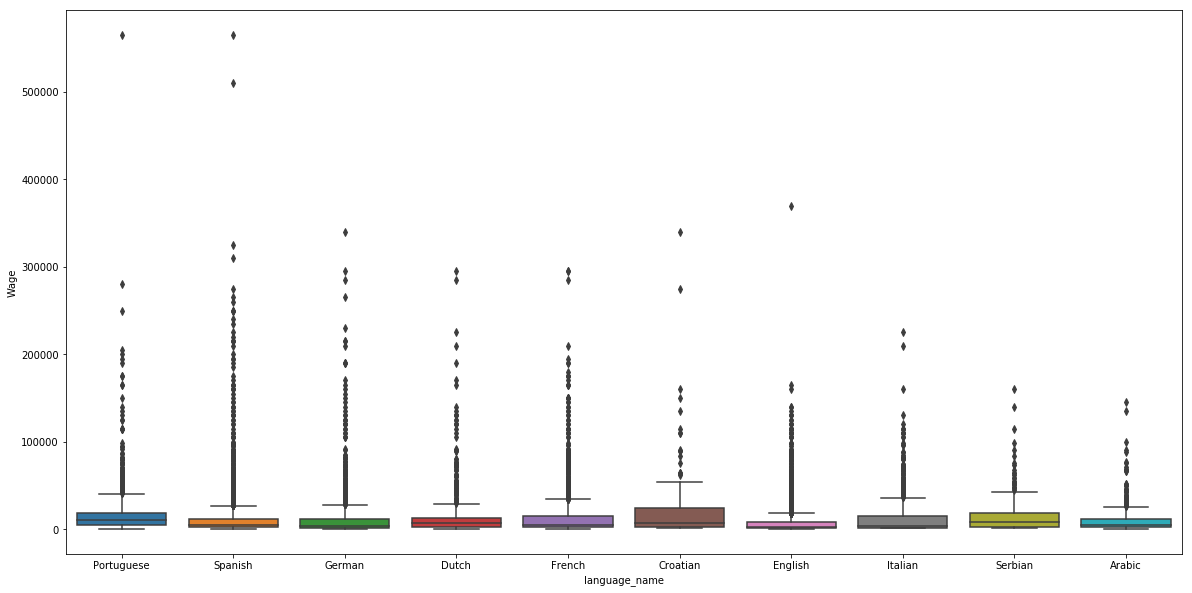

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='language_name', y='Wage', data=df2)

In [0]:
#We make again the same plot but only with the top 100 playes by wage
players = []
for l in top_10_value:
  plys = df[df.language_name == l][['Name','Wage']].sort_values('Wage',ascending=False)
  players += list(plys['Name'][:100])

In [0]:
df3 = df2[df2['Name'].isin(players)]

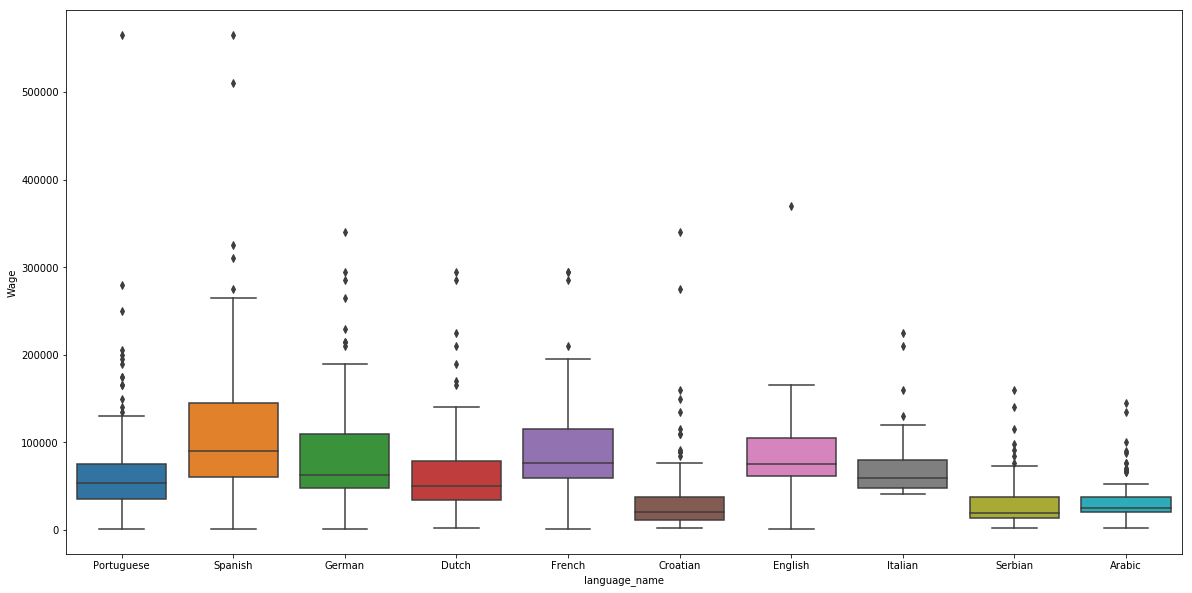

In [0]:
#Wage box plot 
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='language_name', y='Wage', data=df3)

Spanish language have the highest median, for every language there is an important number of outliers or players whose wage is well above the median salary

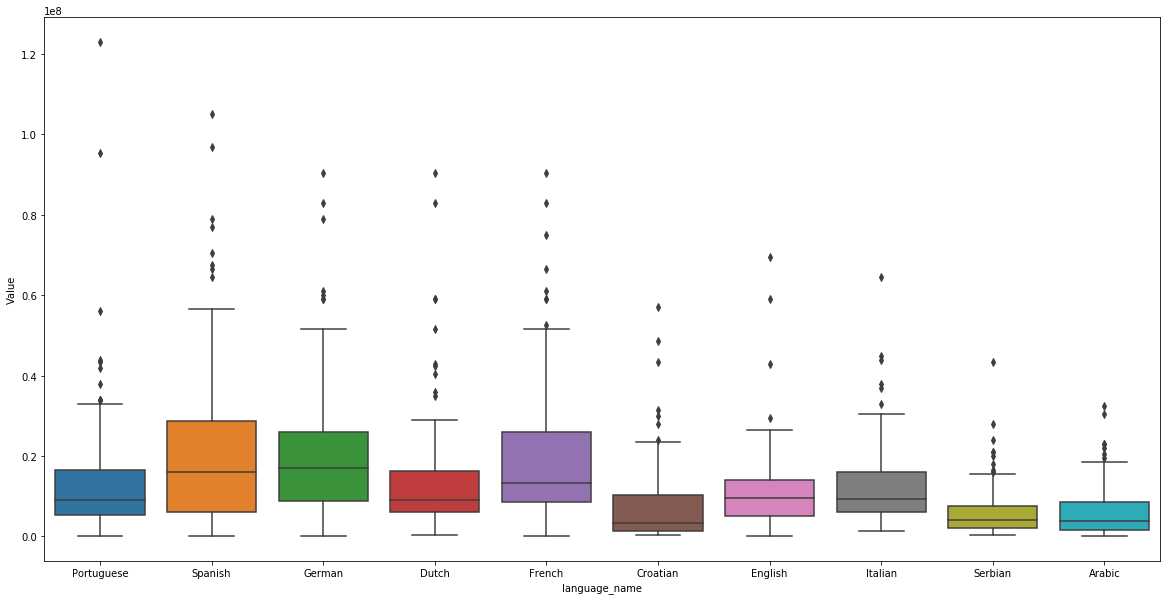

In [25]:
#Value box plot
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='language_name', y='Value', data=df3)

In this case German language have the highest median, and we see an important number of outliers or players whose value is quit higher from the median.

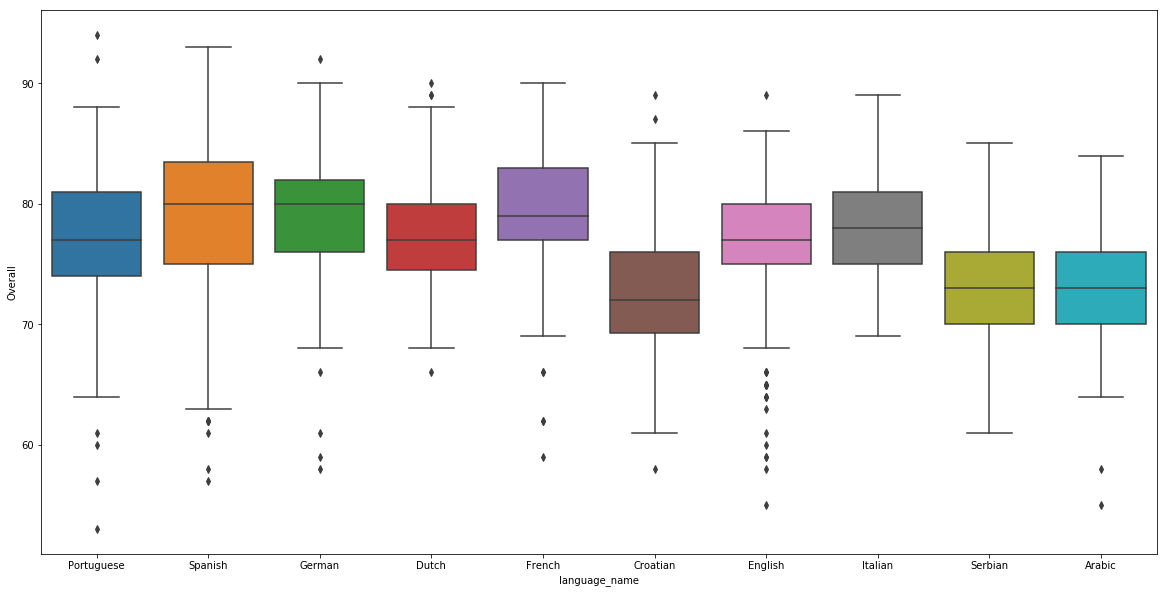

In [28]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='language_name', y='Overall', data=df3)

For overall spanish and german languages have same highest median of 80, and we see an important number of outliers in the bottom or players whose overall is very low compare to the median.

## Pairplots

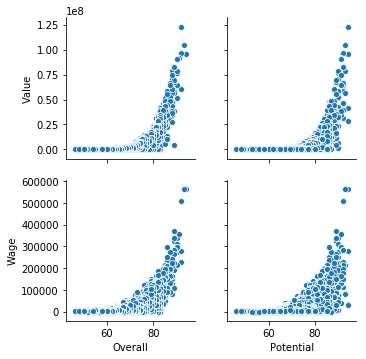

In [29]:
#Analyze relationship between variable
g = sns.pairplot(df, x_vars=["Overall", "Potential"], 
                     y_vars=["Value", "Wage"])

For wage and value , it can see an almost exponential relationship with Overall and Potential

## Number of observations analysis

In [33]:
#Top Average wage all countries
df_value2 = df[df.Wage > 0].groupby('language_name',as_index=False).agg({'Value':'mean','Wage':'mean','ID':'count'})
df_value2.sort_values('Wage',ascending=False,inplace=True)
df_value2.reset_index(drop=True,inplace=True)
df_value2.head(10)

,language_name,Value,Wage,ID
0,Hebrew,3.462500e+06,21833.333333,12
1,Croatian,4.643856e+06,21510.638298,188
2,Bosnian,3.940250e+06,17412.500000,80
3,Portuguese,4.073830e+06,17233.224223,1222
4,Russian,2.050917e+06,16642.011834,338
5,Serbian,3.621988e+06,16409.836066,244
6,Armenian,2.577800e+06,15760.000000,25
7,Romanian,2.577455e+06,15527.272727,55
8,Peul,4.044615e+06,15384.615385,39
9,Dutch,3.524551e+06,15312.762973,713


If we analyze the average wage of all language, Hebrew is in first place but with only 12 observations, very few if we compare it with the 1222 observations of portugal

It is very likely that that the data is only considering the most important Hebrew players, without considering other players of lower performance. For this reason in some cases we will only take countries or languages that have a high number of data


In [0]:
df.to_csv(MAINDIR +'CompleteDataLanguage.csv', index=False)